In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, spearmanr
from utils import barh_plot, corr_heatmap, dist_manh_plot

from sklearn.metrics.pairwise import pairwise_distances_argmin

# Загрузка данных

In [2]:
data = pd.read_csv('NY_Realstate_Pricing.csv')
data = data.drop(columns=['F1', 'id'])
data.head()

,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [3]:
universities = pd.read_csv('universities.csv', index_col=0)
universities

,Latitude,Longitude
University,,
Cornell University,42.448500,-76.478600
Columbia University,40.807384,-73.963036
New York University,40.724700,-73.990300
University of Rochester,43.128330,-77.628326
Syracuse University,43.037700,-76.134000
University at Buffalo; State University of New York,42.992830,-78.773990
Rochester Institute of Technology,43.084300,-77.674470
Fordham University,40.856500,-73.884610
Rensselaer Polytechnic Institute,42.730000,-73.677500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighbourhood          17614 non-null  object 
 1   latitude               17614 non-null  float64
 2   longitude              17614 non-null  float64
 3   room_type              17614 non-null  object 
 4   price                  17614 non-null  int64  
 5   days_occupied_in_2019  17614 non-null  int64  
 6   minimum_nights         17614 non-null  int64  
 7   number_of_reviews      17614 non-null  int64  
 8   reviews_per_month      17614 non-null  float64
 9   availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.3+ MB


# Обработка данных

Удаилили объявления с ценами <= 10

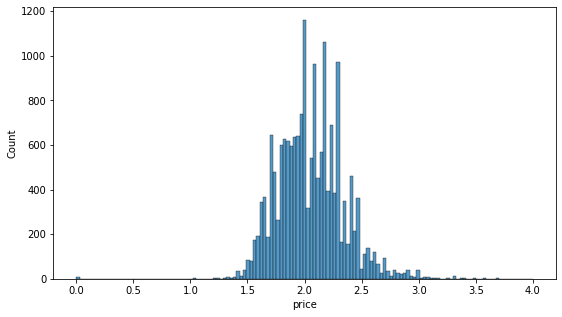

In [5]:
_, ax = plt.subplots(figsize=(9, 5))
sns.histplot(np.log10(data['price']+1));

In [4]:
data = data[data['price'] > 10]
data = data[data['price'] <= 2000]

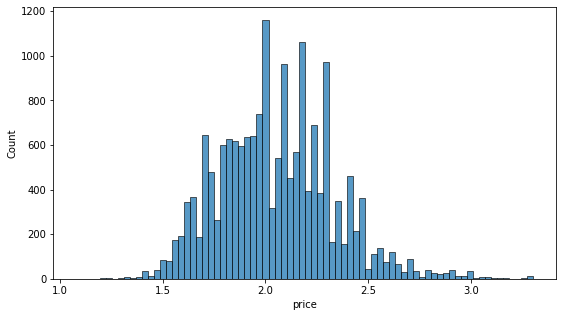

In [7]:
_, ax = plt.subplots(figsize=(9, 5))
sns.histplot(np.log10(data['price']+1));

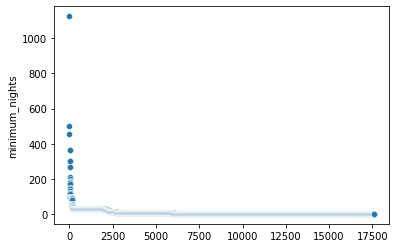

In [8]:
sns.scatterplot(y=data['minimum_nights'].sort_values(ascending=False), x=range(len(data)));


In [5]:
data = data[data['minimum_nights'] <= 366]

# Описание перменных

## neighbourhood

In [294]:
data['neighbourhood'].nunique()

186

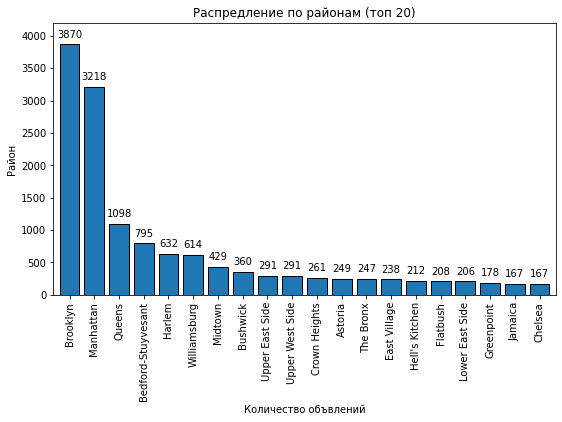

In [340]:
barh_plot(
    data['neighbourhood'].value_counts()[:20],
    (0, 4200),
    'Распредление по районам (топ 20)',
    'Количество объвлений',
    'Район'
)

## room_type

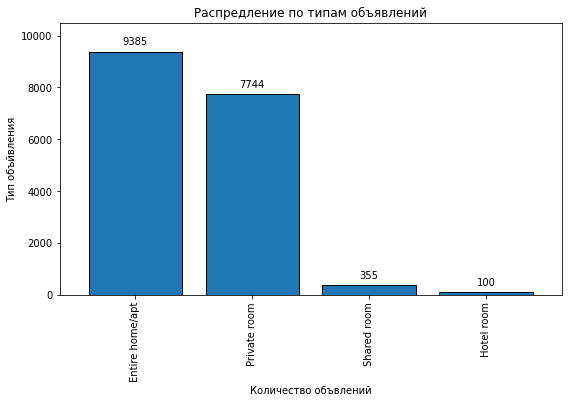

In [339]:
barh_plot(
    data['room_type'].value_counts(),
    (0, 10500),
    'Распредление по типам объявлений',
    'Количество объвлений',
    'Тип объйвления'
)

## Числовые переменные

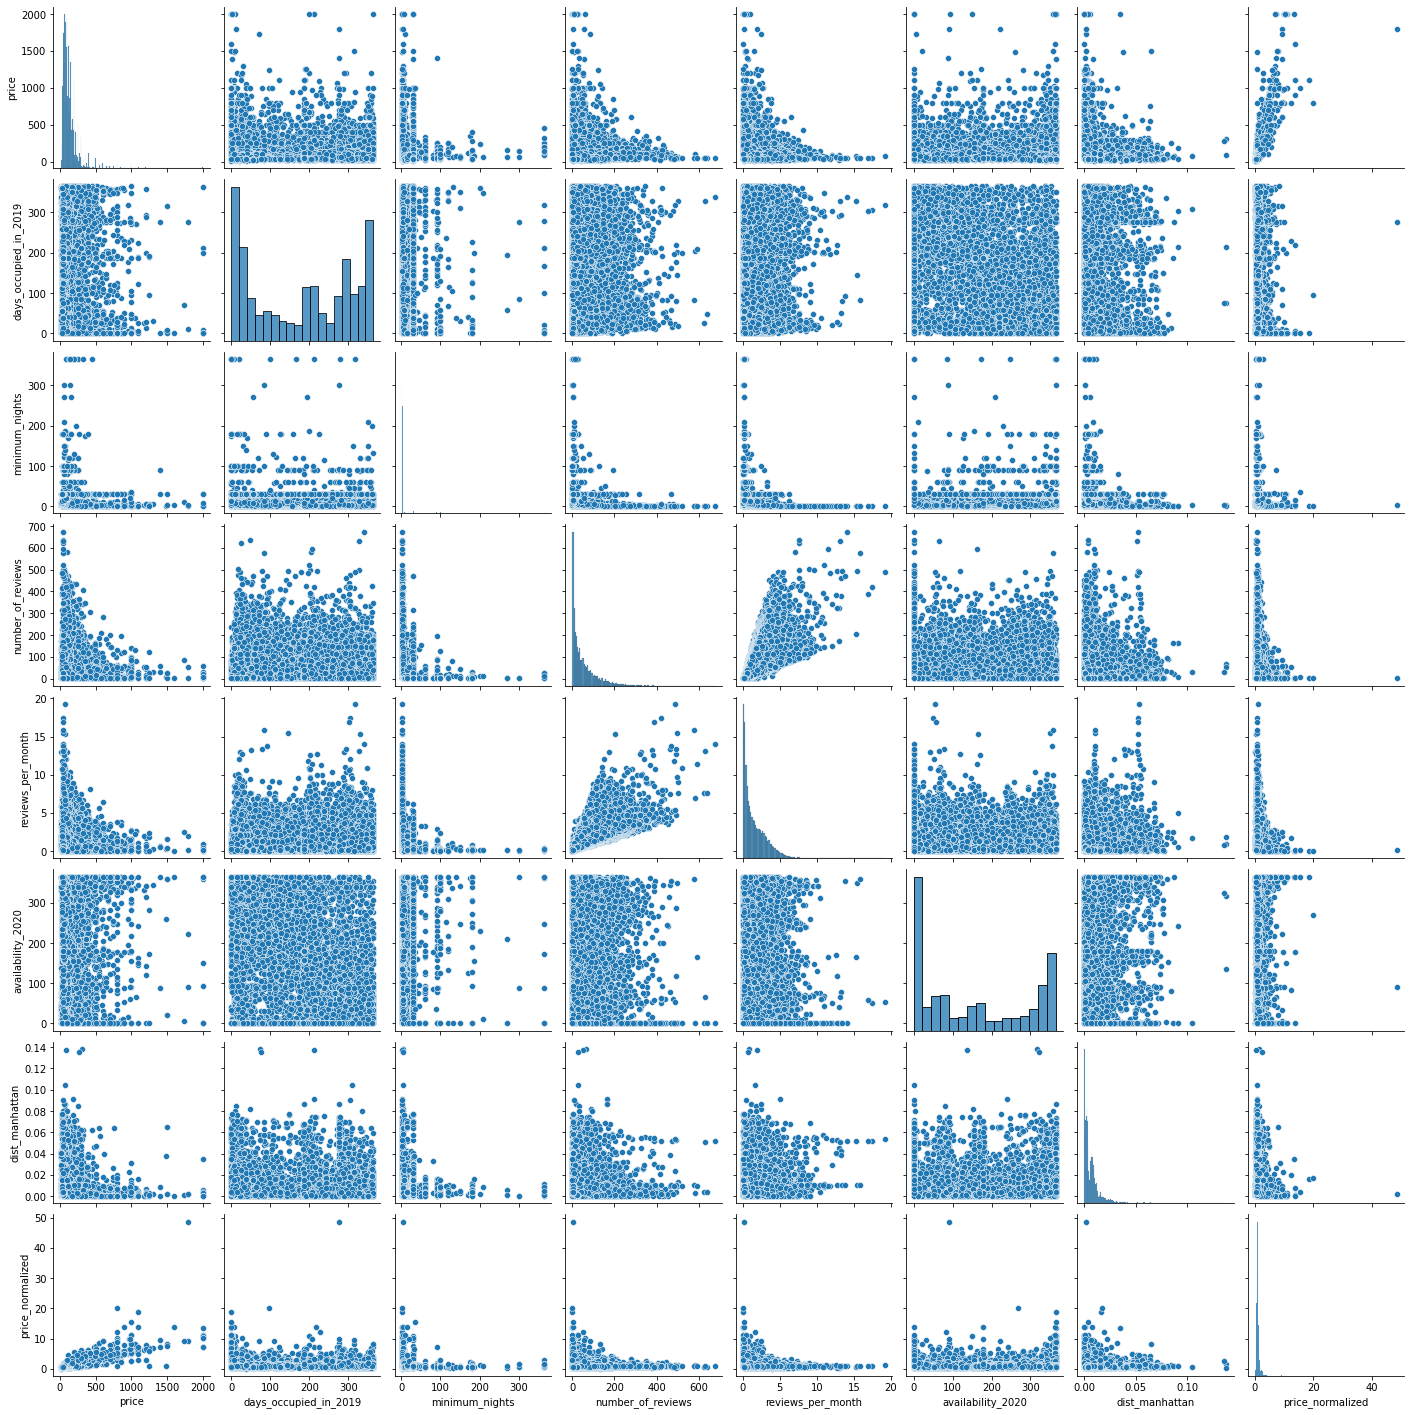

In [297]:
sns.pairplot(data.iloc[:, 4:]);